## Домашнее задание 2

Реализуйте детектирование ssd (маленький черный в середине) в коде функции *detect_objects*. Ответ нужно возвращать в виде четырех чисел как в примере.

В нижней части ноутбука находится код для автопроверки, так можно узнать, насколько ответы вашего метода похожи на эталонные. Изучите код автопроверки, это может быть полезно.

In [40]:
import numpy as np
import cv2

def detect_objects(frame):
    answer = []
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    cv2.namedWindow("mask")
    cv2.createTrackbar("Hue High", "mask", 160, 255, lambda x: x)
    cv2.createTrackbar("Hue Low", "mask", 100, 255, lambda x: x)
    cv2.createTrackbar("Saturation High", "mask", 150, 255, lambda x: x)
    cv2.createTrackbar("Saturation Low", "mask", 110, 255, lambda x: x)
    cv2.createTrackbar("Value High", "mask", 110, 255, lambda x: x)
    cv2.createTrackbar("Value Low", "mask", 25, 255, lambda x: x)
    cv2.createTrackbar("high_area", "mask", 6000, 14000, lambda x: x)
    cv2.createTrackbar("low_area", "mask", 2000, 4000, lambda x: x)

    h_high = cv2.getTrackbarPos("Hue High", "mask")
    h_low = cv2.getTrackbarPos("Hue Low", "mask")
    
    s_high = cv2.getTrackbarPos("Saturation High", "mask")
    s_low = cv2.getTrackbarPos("Saturation Low", "mask")
    
    v_high = cv2.getTrackbarPos("Value High", "mask")
    v_low = cv2.getTrackbarPos("Value Low", "mask")

    low_area = cv2.getTrackbarPos("low_area", "mask")
    high_area = cv2.getTrackbarPos("high_area", "mask")

    low_color = np.array([h_low, s_low, v_low])
    up_color = np.array([h_high, s_high, v_high])
    
    mask = cv2.inRange(hsv, low_color, up_color)

    labels, _, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=4, ltype=cv2.CV_32S)
  
    for i in range(labels):
        t = stats[i, cv2.CC_STAT_TOP]
        l = stats[i, cv2.CC_STAT_LEFT]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        a = stats[i, cv2.CC_STAT_AREA]
        
        if low_area < a < high_area:
            if h > w and h < 120 and l<700:
                answer.append([l, t, w, h])

    return answer

def draw_answer(frame, bboxes):
    for b in bboxes:
        l, t, w, h = b
        
        cv2.rectangle(frame, (l, t), (l + w, t + h), (123, 34, 125), 3)
    
    return frame



In [41]:
answers = []

video_name = "black_objects.mp4"

cam = cv2.VideoCapture(video_name)

while(True):
    succ, frame = cam.read()
    
    if (succ == False):
        print("cannot read frame, exiting")
        break
    
    answer = detect_objects(frame)
    answers.append(answer)
    
    marked = draw_answer(frame, answer)
    
    cv2.imshow("result", marked)
    
    key = cv2.waitKey(30) & 0xFF
    
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

In [42]:
import numpy as np
import cv2

reference_answers_1 = [[(368, 196, 70, 88)],
                     [(370, 198, 69, 90)],
                     [(370, 202, 70, 88)],
                     [(368, 206, 70, 90)],
                     [(368, 210, 70, 90)],
                     [(368, 214, 70, 90)],
                     [(369, 218, 69, 89)],
                     [(369, 222, 70, 90)],
                     [(368, 224, 70, 92)],
                     [(366, 229, 70, 91)],
                     [(362, 234, 70, 92)],
                     [(358, 234, 70, 93)],
                     [(354, 236, 70, 92)],
                     [(352, 238, 69, 91)],
                     [(352, 240, 68, 92)],
                     [(354, 240, 67, 92)],
                     [(358, 240, 66, 89)],
                     [(361, 240, 65, 88)],
                     [(367, 242, 65, 86)],
                     [(375, 244, 61, 83)],
                     [(383, 246, 59, 82)],
                     [(392, 250, 58, 80)],
                     [(400, 253, 56, 79)],
                     [(406, 256, 56, 76)],
                     [(414, 257, 54, 75)],
                     [(420, 256, 55, 76)],
                     [(424, 254, 56, 74)],
                     [(428, 252, 54, 74)],
                     [(430, 252, 56, 74)],
                     [(430, 250, 58, 75)],
                     [(432, 248, 58, 75)],
                     [(434, 244, 58, 76)],
                     [(436, 243, 60, 77)],
                     [(436, 242, 62, 76)],
                     [(436, 239, 62, 77)],
                     [(436, 234, 62, 78)],
                     [(433, 230, 65, 80)],
                     [(431, 228, 66, 84)],
                     [(430, 228, 68, 85)],
                     [(428, 224, 69, 89)],
                     [(425, 224, 71, 92)],
                     [(422, 230, 74, 90)],
                     [(420, 235, 74, 95)],
                     [(416, 238, 78, 98)],
                     [(413, 240, 79, 102)],
                     [(410, 244, 80, 104)],
                     [(408, 248, 82, 104)],
                     [(408, 252, 84, 107)],
                     [(408, 256, 85, 108)],
                     [(406, 262, 87, 110)],
                     [(407, 268, 89, 110)],
                     [(406, 278, 92, 112)],
                     [(405, 286, 95, 114)],
                     [(404, 286, 98, 116)],
                     [(406, 288, 99, 115)],
                     [(408, 284, 100, 116)],
                     [(408, 282, 100, 114)],
                     [(410, 280, 100, 113)],
                     [],
                     [],
                     [],
                     [],
                     [],
                     [],
                     [],
                     [(444, 224, 88, 102)],
                     [(452, 228, 86, 98)],
                     [(462, 232, 82, 94)],
                     [(476, 238, 74, 90)],
                     [(488, 242, 72, 84)],
                     [(502, 248, 68, 82)],
                     [(512, 260, 64, 76)],
                     [(520, 274, 64, 74)],
                     [(532, 276, 60, 78)],
                     [(540, 278, 59, 78)],
                     [(552, 283, 56, 79)],
                     [(561, 292, 55, 82)],
                     [(567, 298, 59, 82)],
                     [(577, 302, 62, 86)],
                     [(588, 304, 62, 89)],
                     [(596, 306, 64, 88)],
                     [(608, 304, 63, 90)],
                     [(616, 304, 66, 88)],
                     [(624, 302, 66, 86)],
                     [(630, 294, 66, 84)],
                     [(632, 288, 69, 86)],
                     [(638, 284, 66, 86)],
                     [(636, 278, 65, 87)],
                     [(632, 275, 68, 87)],
                     [(632, 276, 67, 86)],
                     [(632, 280, 66, 86)],
                     [(632, 280, 62, 85)],
                     [(630, 277, 62, 87)],
                     [(628, 276, 64, 84)],
                     [(627, 276, 61, 85)],
                     [(620, 278, 62, 82)],
                     [(616, 282, 60, 82)],
                     [(612, 287, 59, 81)],
                     [(608, 291, 60, 81)],
                     [(604, 291, 58, 81)],
                     [(602, 295, 60, 79)],
                     [(598, 298, 61, 82)],
                     [(594, 296, 62, 80)],
                     [(590, 294, 62, 80)],
                     [(584, 295, 64, 83)],
                     [(581, 296, 67, 84)],
                     [(580, 292, 67, 86)],
                     [(580, 298, 67, 84)],
                     [(578, 307, 68, 85)],
                     [(578, 310, 70, 86)],
                     [(580, 314, 68, 85)],
                     [(582, 322, 69, 86)],
                     [(582, 331, 74, 88)],
                     [(583, 333, 75, 91)],
                     [(584, 336, 75, 90)],
                     [(584, 336, 76, 92)],
                     [(584, 334, 74, 90)],
                     [(584, 330, 74, 93)],
                     [(584, 332, 74, 93)],
                     [(586, 334, 74, 92)],
                     [(590, 335, 72, 90)],
                     [(598, 340, 70, 88)],
                     [(602, 340, 74, 94)],
                     [(610, 350, 74, 90)],
                     [(620, 360, 75, 90)],
                     [(630, 368, 79, 94)],
                     [(646, 373, 79, 95)],
                     [(656, 377, 83, 96)],
                     [(666, 382, 87, 98)],
                     [],
                     [(677, 381, 87, 99)],
                     [],
                     [],
                     [],
                     [(646, 360, 84, 94), (614, 470, 60, 70)],
                     [],
                     [],
                     [(614, 328, 78, 88)],
                     [],
                     []]

def calc_IoU(mask1, mask2):
    intersection = cv2.bitwise_and(mask1, mask2).sum()
    union = cv2.bitwise_or(mask1, mask2).sum()
    
    IoU = 1
    
    if (union != 0):
        IoU = intersection / union
    
    return IoU

def create_mask_by_bboxes(bboxes, sz):
    mask = np.zeros(sz, np.uint8)
    
    for bbox in bboxes:
        x, y, w, h = bbox
        
        mask[x : x + w, y : y + h] = 255
    
    return mask

IoUs = []

for i in range(len(answers)):
    user_mask      = create_mask_by_bboxes(answers[i], (960, 540))
    reference_mask = create_mask_by_bboxes(reference_answers_1[i], (960, 540))
    
    IoU = calc_IoU(user_mask, reference_mask)
    IoUs.append(IoU)

Your score is 0.942


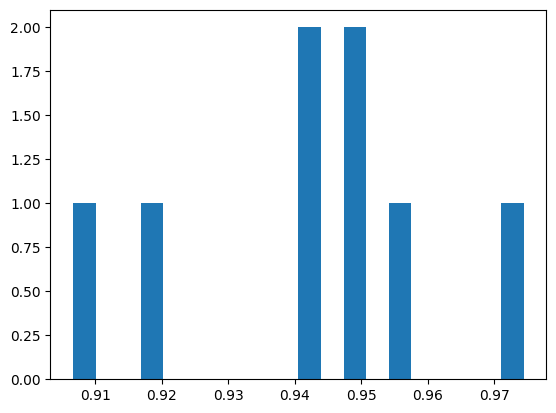

In [43]:
import matplotlib.pyplot as plt

mean_IoU = np.mean(IoUs)

print("Your score is " + str(mean_IoU)[:5])

#plt.plot(IoUs)
#plt.show()

plt.hist(IoUs, bins=20)
plt.show()